In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='paper')


In [2]:
import os
os.listdir('data')

['10cc FACS results.xlsx',
 '10cc FL.xlsx',
 '10cc metadata.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10CC_shading_230302025.xlsx',
 'CCPA.pkl.gz',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx']

In [3]:
from seaborn_figure_settings import * 

In [4]:
exdata =  pd.read_excel(os.path.join('data','10CC_shading_230302025.xlsx'), sheet_name=None)

In [5]:
exdata.keys()

dict_keys(['het growth', 'FL', 'HET concentrations', 'experiment plan', 'starter FCM'])

In [6]:
df_fl = exdata['FL']
df_setup = exdata['HET concentrations']
df_facs_starter = exdata['starter FCM']

In [37]:
df_fl['reference_baseline_FL'] = df_fl['baseline']
mdf_fl = df_fl.melt(id_vars=['id','name', 'reference_baseline_FL'], value_name='FL', var_name='Treatment')

In [39]:
mdf_fl['% FL Drop'] = mdf_fl['FL'].div(mdf_fl['reference_baseline_FL'])

In [40]:
df_setup

,id,bacteria,baseline,add 0.04 ml,add 0.4 ml,add 4 ml
0,NaN,NaN,0,4.000000e-02,4.000000e-01,4.000000e+00
1,1.0,Axenic,0,0.000000e+00,0.000000e+00,0.000000e+00
2,2.0,HOT1A3,0,1.847864e+06,2.002671e+07,1.695736e+08
3,3.0,HP15,0,8.699002e+05,9.427768e+06,7.982842e+07
4,4.0,Pgall,0,5.957086e+05,6.456146e+06,5.466658e+07
5,5.0,CIP,0,8.679641e+05,9.406785e+06,7.965074e+07
6,7.0,nitzsch,0,4.007365e+06,4.343086e+07,3.677452e+08
7,10.0,HOT5_F3,0,4.002914e+06,4.338262e+07,3.673367e+08
8,11.0,HOT5_C3,0,8.873453e+05,9.616834e+06,8.142931e+07


In [41]:
df_setup['baseline'] = 0
mdf_setup = df_setup.dropna().melt(id_vars=['id','bacteria'], value_name='HET concentration', var_name='Treatment')

In [90]:
df_facs_starter1 = df_facs_starter.dropna(subset='experiment ID').groupby('experiment ID')['MED4 cell/ml'].mean().reset_index()

In [91]:
df_facs_starter1.rename(columns={'MED4 cell/ml':'baseline'}, inplace=True)
df_facs_starter1['reference_baseline_MED4_FCM'] = df_facs_starter1['baseline'] 


In [92]:
starter_vol_baseline = 20
starter_vol_004 = 20+0.04
starter_vol_04 = starter_vol_004 -0.1 + 0.4
starter_vol_4 = starter_vol_04 -0.1 + 4

percent_med4_after_facs_sample_004 = 1
percent_med4_after_facs_sample_04 = (starter_vol_004 -0.1)/ starter_vol_004
percent_med4_after_facs_sample_4 = (starter_vol_04 -0.1)/ starter_vol_04

med4_loss_ratio_004 = starter_vol_baseline / starter_vol_004  
med4_loss_ratio_04 = med4_loss_ratio_004 * (starter_vol_004 / starter_vol_04)
med4_loss_ratio_4 = med4_loss_ratio_04 * (starter_vol_04 / starter_vol_4)

med4_loss_ratio_004 , med4_loss_ratio_04 , med4_loss_ratio_4 


(0.9980039920159681, 0.9832841691248773, 0.8250825082508253)

In [93]:
df_facs_starter1['add 0.04 ml'] = df_facs_starter1['baseline'] * med4_loss_ratio_004
df_facs_starter1['add 0.4 ml'] = df_facs_starter1['baseline'] * med4_loss_ratio_04
df_facs_starter1['add 4 ml'] = df_facs_starter1['baseline'] * med4_loss_ratio_4



In [94]:
df_facs_starter1

,experiment ID,baseline,reference_baseline_MED4_FCM,add 0.04 ml,add 0.4 ml,add 4 ml
0,1.0,192380000.0,192380000.0,1.919960e+08,1.891642e+08,1.587294e+08
1,2.0,225580000.0,225580000.0,2.251297e+08,2.218092e+08,1.861221e+08
2,3.0,168720000.0,168720000.0,1.683832e+08,1.658997e+08,1.392079e+08
3,4.0,245140000.0,245140000.0,2.446507e+08,2.410423e+08,2.022607e+08
4,5.0,211020000.0,211020000.0,2.105988e+08,2.074926e+08,1.741089e+08
5,7.0,271410000.0,271410000.0,2.708683e+08,2.668732e+08,2.239356e+08
6,10.0,256710000.0,256710000.0,2.561976e+08,2.524189e+08,2.118069e+08
7,11.0,244060000.0,244060000.0,2.435729e+08,2.399803e+08,2.013696e+08


In [95]:
mdf_facs_starter = df_facs_starter1.melt(
    id_vars=['experiment ID', 'reference_baseline_MED4_FCM'], 
    value_vars=['baseline','add 0.04 ml', 'add 0.4 ml', 'add 4 ml'], 
    value_name='MED4 concentration', 
    var_name='Treatment'
)

In [109]:
mdf_facs_starter['% MED4 concentration Drop'] = mdf_facs_starter['Treatment'].map({
    #'baseline':1
    'add 0.04 ml' :  med4_loss_ratio_004,
    'add 0.4 ml': med4_loss_ratio_04,
    'add 4 ml':  med4_loss_ratio_4,
})

In [110]:
mdf_facs_starter.columns, mdf_setup.columns, mdf_fl.columns

(Index(['experiment ID', 'reference_baseline_MED4_FCM', 'Treatment',
        'MED4 concentration', '% MED4 concentration Drop'],
       dtype='object'),
 Index(['id', 'bacteria', 'Treatment', 'HET concentration'], dtype='object'),
 Index(['id', 'name', 'reference_baseline_FL', 'Treatment', 'FL', '% FL Drop'], dtype='object'))

In [111]:
df1 = pd.merge(mdf_facs_starter, mdf_setup, left_on=['experiment ID', 'Treatment'], right_on=['id','Treatment'] )
df2 = pd.merge(df1, mdf_fl, on=['id', 'Treatment'])
df= df2 
df

,experiment ID,reference_baseline_MED4_FCM,Treatment,MED4 concentration,% MED4 concentration Drop,id,bacteria,HET concentration,name,reference_baseline_FL,FL,% FL Drop
0,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.032,7.032,1.000000
1,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.010,7.010,1.000000
2,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.168,7.168,1.000000
3,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.090,7.090,1.000000
4,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,6.897,6.897,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
155,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.979,1.471,0.210775
156,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,7.067,1.519,0.214943
157,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.853,1.508,0.220050
158,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.860,1.584,0.230904


In [ ]:
df.bacteria.unique

In [140]:
df['group'] = 'HET'
df.loc[df.bacteria.isin(['Axenic']), 'group'] = 'ctrl'

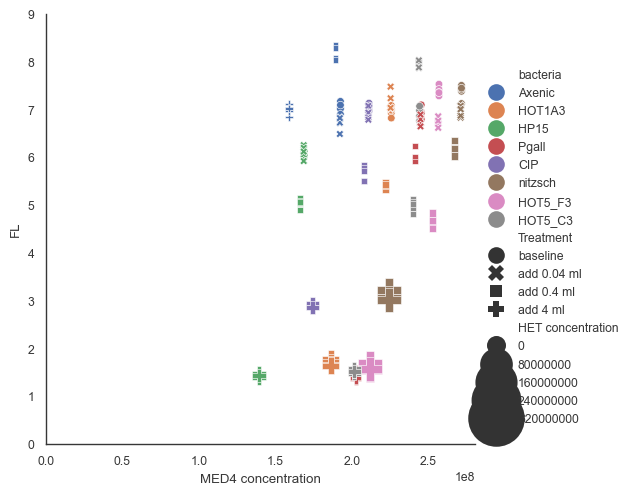

In [112]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    sizes=(30,300),
).set(ylim=(0,9), xlim=(0,2.8e8))
    


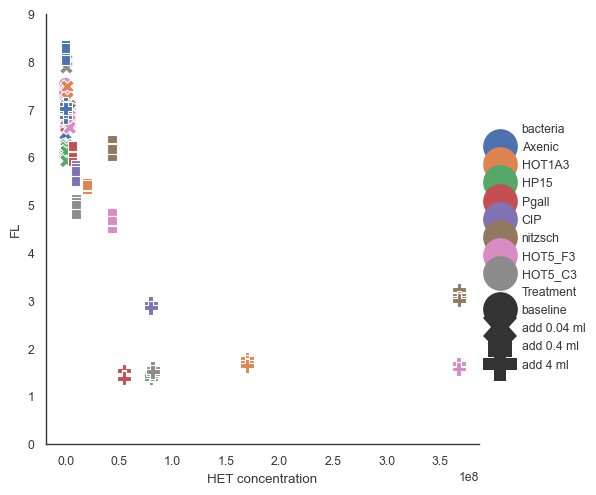

In [113]:
sns.relplot(
    data=df,
    #size='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    x='HET concentration',
    s=100,
    sizes=(30,300),
).set(ylim=(0,9)) #, xlim=(-1e7,2e8))
    


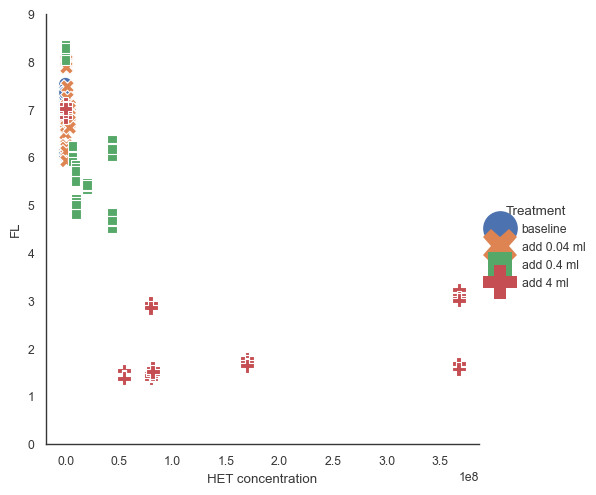

In [114]:
sns.relplot(
    data=df,
    #size='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='Treatment',
    x='HET concentration',
    s=100,
    sizes=(30,300),
).set(ylim=(0,9)) #, xlim=(-1e7,2e8))
    


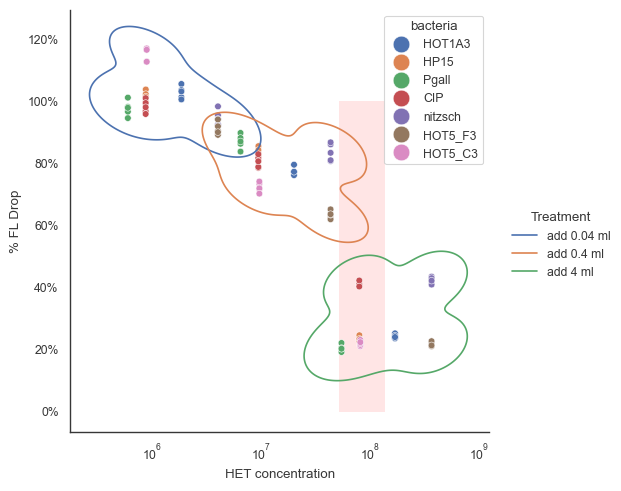

In [161]:
sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='% FL Drop',
    hue='Treatment',
    x='HET concentration',
    log_scale=(True, False), kind='kde',
    levels=2,
    
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='% FL Drop',
    hue='bacteria',
    x='HET concentration',
    #legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
import matplotlib.ticker as mtick

plt.fill_betweenx([0,1], 5.133843e+07, 1.376131e+08,
                facecolor='red', alpha=0.1, zorder=-1)



plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))


<Axes: xlabel='HET concentration', ylabel='FL'>

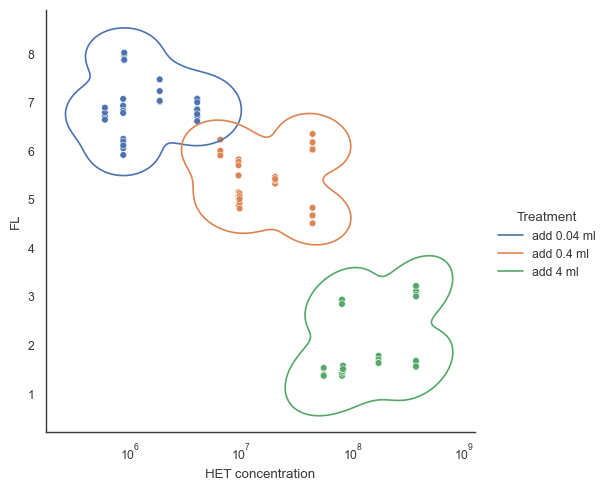

In [160]:
sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    x='HET concentration',
    log_scale=(True, False), kind='kde',
    levels=2,
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    x='HET concentration',legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))



<Axes: xlabel='MED4 concentration', ylabel='FL'>

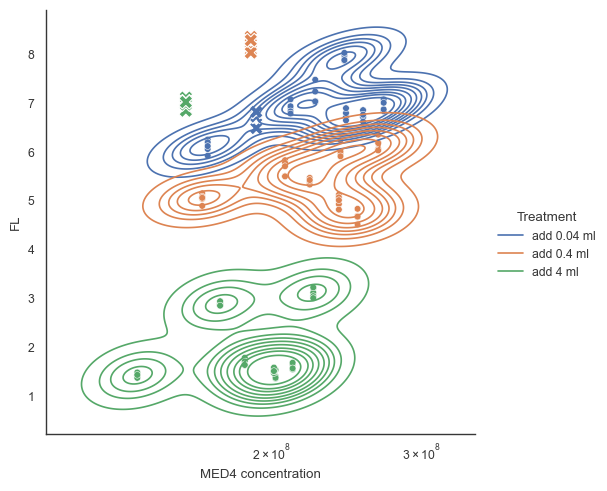

In [152]:
sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    x='MED4 concentration',
    log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    x='MED4 concentration',
    legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.scatterplot(
    data=df.loc[df['group'].isin(['ctrl']) & ~df['Treatment'].isin(['baseline'])].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    style='phylo', markers=['X'], s=100,
    x='MED4 concentration', legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))


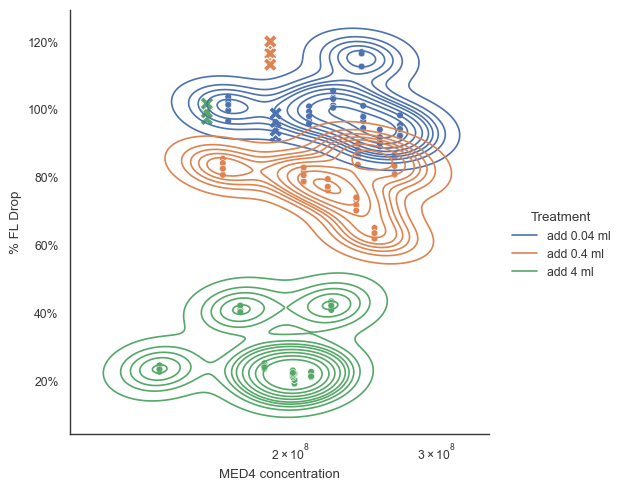

In [154]:
sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='% FL Drop',
    hue='Treatment',
    x='MED4 concentration',
    log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='% FL Drop',
    hue='Treatment',
    x='MED4 concentration',
    legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.scatterplot(
    data=df.loc[df['group'].isin(['ctrl']) & ~df['Treatment'].isin(['baseline'])].reset_index(),
    #size='MED4 concentration',
    y='% FL Drop',
    hue='Treatment',
    style='phylo', markers=['X'], s=100,
    x='MED4 concentration', legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))


In [118]:
df['% MED4 concentration Drop'].value_counts()

% MED4 concentration Drop
0.998004    40
0.983284    40
0.825083    40
Name: count, dtype: int64

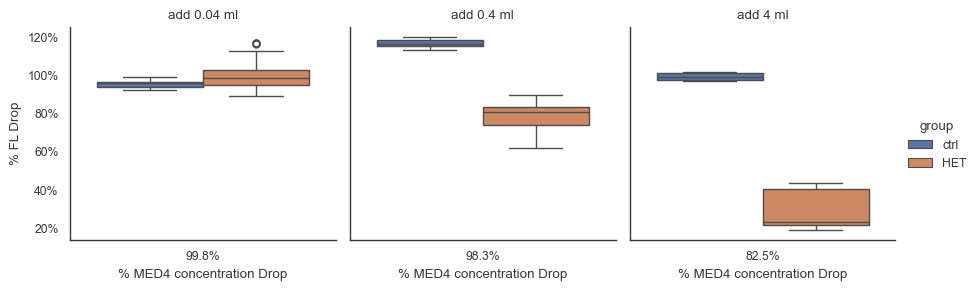

In [147]:

g = sns.catplot(
    data=df, # .loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='% FL Drop',
    hue='group',
    x='% MED4 concentration Drop',
    orient='x',
    kind='box', formatter=lambda x: f"{x:.1%}",
    col='Treatment', sharex=False, col_order=['add 0.04 ml', 'add 0.4 ml', 'add 4 ml', ],
    height=3,
).set_titles(col_template='{col_name}') 
# .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
#plt.gca().xaxis.set_inverted(True)  # inverted axis with autoscaling

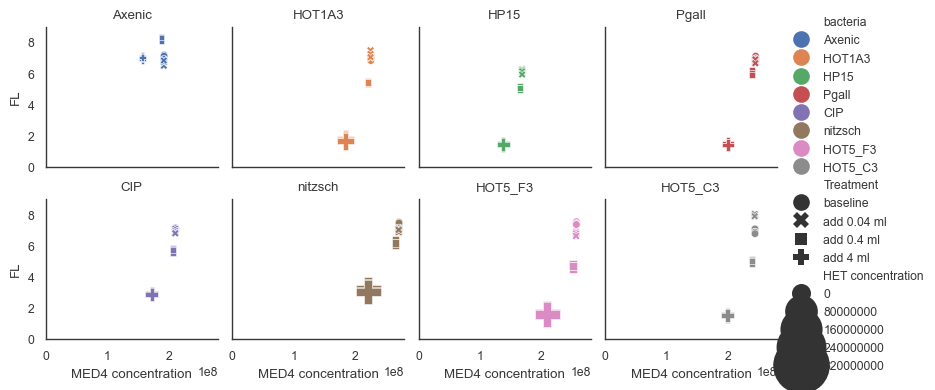

In [21]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    col='bacteria', col_wrap=4,

    height=2,
    sizes=(30,300),
).set(ylim=(0,9), xlim=(0,2.8e8)
).set_titles(col_template='{col_name}')


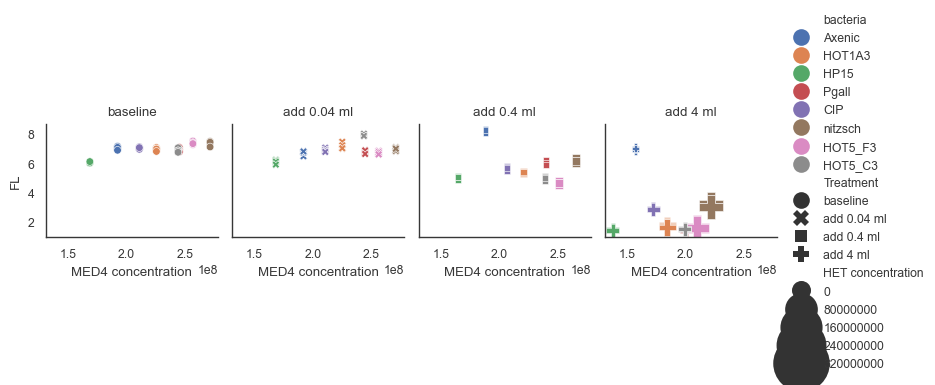

In [22]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    col='Treatment', 

    height=2,
    sizes=(30,300)
).set_titles(col_template='{col_name}')

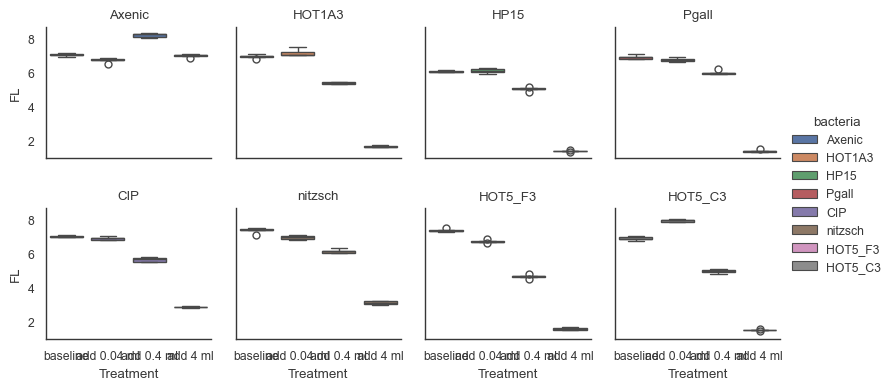

In [23]:
sns.catplot(
    data=df,
    x='Treatment',
    y='FL',
    hue='bacteria',
    col='bacteria', col_wrap=4,
    kind='box',
    height=2,
).set_titles(col_template='{col_name}')
